In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
E_commerce_data = pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [3]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)":"C_service"}, axis = 1)

In [4]:
E_commerce_data

,Timestamp,Age,Gender,Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,C_service,Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [6]:
data = pd.DataFrame(columns=["Gender","Subscription",'subscription'])

In [7]:
data.Subscription = E_commerce_data["Do you have any subscription on any E-Commerce site?"]
data.Gender=E_commerce_data['Gender']
data.subscription=E_commerce_data['Qualification']

In [8]:
data

,Gender,Subscription,subscription
0,Male,Yes,Graduate
1,Male,Yes,Graduate
2,Male,Yes,Graduate
3,Male,Yes,Graduate
4,Male,No,Higher Secondary
...,...,...,...
107,Male,Yes,Secondary
108,Female,No,Secondary
109,Female,Yes,Higher Secondary
110,Male,No,Post Graduate and above


In [9]:
data1=data.groupby(['Gender','Subscription']).count()

In [10]:
data1

subscription
Gender Subscription              
Female No                      19
       Yes                     15
Male   No                      43
       Yes                     35

In [12]:
data2 = pd.DataFrame(columns=["Gender","subscription"])
row_list = []
for i,j in data1.index:
    dict1 = {}
    dict1.update({"Gender": i, "Subscription":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1

,Gender,Subscription
0,Female,No
1,Female,Yes
2,Male,No
3,Male,Yes


In [13]:
df1["total_subscription"] = list(data1.subscription)

In [14]:
df1["Avg_total_subscription"] = df1.groupby("Gender").transform(lambda x: (x*100)/x.sum())

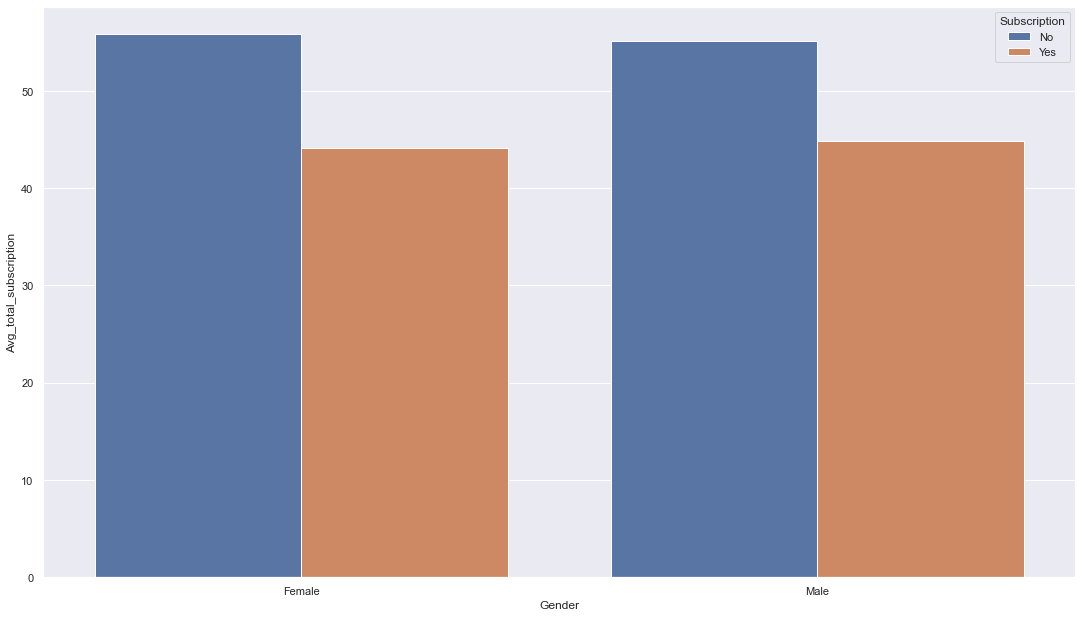

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
sns.barplot(x = 'Gender', y = 'Avg_total_subscription',
           data = df1,
           hue = 'Subscription')
fig.savefig('4(c).png',facecolor='lightgrey',transparent=True)